🎮 REGRESIÓN LINEAL MULTIVARIADA - VENTAS DE VIDEOJUEGOS
Dataset: vgsales.csv

📦 Importar librerías necesarias

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
def mi_funcion_interactiva(parametro1, parametro2):
    # Aquí va el código de tu proyecto que usa parametro1 y parametro2
    resultado = f"Salida: {parametro1} y {parametro2}"
    return resultado

📥 Cargar el dataset

In [425]:
df = pd.read_csv('vgsales.csv')
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


1. Limpieza de datos
Revisar duplicados

In [426]:
print("Duplicados:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicados: 0


Revisar valores nulos

In [427]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


Eliminar filas con valores nulos (si existen)

In [428]:
df = df.dropna()

Verificar nuevamente si hay valores nulos

In [429]:
if df.isnull().sum().any():
    raise ValueError("El dataset contiene valores nulos después de la limpieza.")

2. Estadísticas básicas

In [430]:
print("Resumen estadístico:")
display(df.describe())

Resumen estadístico:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Columnas disponibles

In [431]:
print("Columnas disponibles:", df.columns.tolist())

Columnas disponibles: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


3. Codificación de variables categóricas (One-Hot Encoding)

In [432]:
df_encoded = pd.get_dummies(df, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)
print("Primeras filas del dataset codificado:")
display(df_encoded.head())

Primeras filas del dataset codificado:


,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_3DO,Platform_3DS,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1,Wii Sports,2006.0,41.49,29.02,3.77,8.46,82.74,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Super Mario Bros.,1985.0,29.08,3.58,6.81,0.77,40.24,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Mario Kart Wii,2008.0,15.85,12.88,3.79,3.31,35.82,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Wii Sports Resort,2009.0,15.75,11.01,3.28,2.96,33.00,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Pokemon Red/Pokemon Blue,1996.0,11.27,8.89,10.22,1.00,31.37,False,False,...,False,False,False,False,False,False,False,False,False,False


4. Visualización de la variable objetivo: estimar las stimar las ventas globales de videojuegos

In [433]:
plt.figure(figsize=(10, 5))
plt.hist(df['Global_Sales'], bins=30, color='skyblue', edgecolor='black')

plt.title("Distribución de Ventas Globales de Videojuegos")
plt.xlabel("Ventas Globales (millones de unidades)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)
plt.show()

C:\Users\yoshi\AppData\Local\Temp\ipykernel_2340\14591093.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


5. Matriz de correlación

In [434]:
plt.figure(figsize=(15, 10))
numeric_columns = df_encoded.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlación")
plt.show()

C:\Users\yoshi\AppData\Local\Temp\ipykernel_2340\1737041440.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


ENTRENAMIENTO DEL MODELO DE REGRESIÓN LINEAL

1. Preparar datos

Asegurarse de que todas las columnas sean numéricas

In [435]:
X = df_encoded.drop("Global_Sales", axis=1).select_dtypes(include=[np.number]).values
y = df_encoded["Global_Sales"].values
m = len(y)

Normalizar las características para mejorar la convergencia

In [436]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Añadir columna de unos (bias)

In [437]:
X_b = np.c_[np.ones((m, 1)), X]
print("Shape de X con bias:", X_b.shape)

Shape de X con bias: (16291, 7)


2. Inicializar parámetros

In [438]:
alpha = 0.0001         # tasa de aprendizaje
iterations = 14000      # iteraciones
theta = np.zeros(X_b.shape[1])

3. Definir funciones

In [439]:
def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    loss_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)
        theta -= alpha * gradient
        loss_history.append(compute_loss(X, y, theta))

        if i % 500 == 0:
            print(f"Iteración {i}: Error = {loss_history[-1]:.4f}")

    return theta, loss_history

4. Entrenar modelo

In [440]:
theta_final, loss_history = gradient_descent(X_b, y, theta, alpha, iterations)


Iteración 0: Error = 1.3738
Iteración 500: Error = 1.0593
Iteración 1000: Error = 0.8223
Iteración 1500: Error = 0.6433
Iteración 1500: Error = 0.6433
Iteración 2000: Error = 0.5076
Iteración 2500: Error = 0.4044
Iteración 3000: Error = 0.3256
Iteración 2000: Error = 0.5076
Iteración 2500: Error = 0.4044
Iteración 3000: Error = 0.3256
Iteración 3500: Error = 0.2650
Iteración 3500: Error = 0.2650
Iteración 4000: Error = 0.2183
Iteración 4500: Error = 0.1819
Iteración 5000: Error = 0.1534
Iteración 4000: Error = 0.2183
Iteración 4500: Error = 0.1819
Iteración 5000: Error = 0.1534
Iteración 5500: Error = 0.1308
Iteración 5500: Error = 0.1308
Iteración 6000: Error = 0.1129
Iteración 6500: Error = 0.0984
Iteración 7000: Error = 0.0866
Iteración 6000: Error = 0.1129
Iteración 6500: Error = 0.0984
Iteración 7000: Error = 0.0866
Iteración 7500: Error = 0.0769
Iteración 7500: Error = 0.0769
Iteración 8000: Error = 0.0688
Iteración 8500: Error = 0.0620
Iteración 9000: Error = 0.0562
Iteración 80

5. Gráfico de convergencia

In [441]:
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), loss_history, color='orange')
plt.title("Convergencia del Error - Regresión Lineal")
plt.xlabel("Iteraciones")
plt.ylabel("Error (ECM)")
plt.grid(True)
plt.show()

C:\Users\yoshi\AppData\Local\Temp\ipykernel_2340\4283603714.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


6. Evaluación con R²

In [442]:
from sklearn.metrics import r2_score
y_pred = X_b.dot(theta_final)
r2 = r2_score(y, y_pred)
print(f"Coeficiente de determinación R²: {r2:.4f}")


Coeficiente de determinación R²: 0.9790


### Interfaz interactiva: Predice las ventas globales de un videojuego

In [443]:
# 1. Obtener las columnas originales y las categorías para codificación
platforms = sorted(df['Platform'].unique())
genres = sorted(df['Genre'].unique())
publishers = sorted(df['Publisher'].unique())

# Nueva función para mostrar gráficas y predicción en Gradio
def gradio_prediccion_y_graficas(Name, Year, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Platform, Genre, Publisher):
    import matplotlib
    matplotlib.use("Agg")
    import matplotlib.pyplot as plt
    import io
    from PIL import Image
    import numpy as np

    # --- Predicción ---
    try:
        Year = float(Year) if Year not in [None, ""] else 0
        NA_Sales = float(NA_Sales) if NA_Sales not in [None, ""] else 0
        EU_Sales = float(EU_Sales) if EU_Sales not in [None, ""] else 0
        JP_Sales = float(JP_Sales) if JP_Sales not in [None, ""] else 0
        Other_Sales = float(Other_Sales) if Other_Sales not in [None, ""] else 0
        input_dict = {
            'Rank': 1,
            'Year': Year,
            'NA_Sales': NA_Sales,
            'EU_Sales': EU_Sales,
            'JP_Sales': JP_Sales,
            'Other_Sales': Other_Sales
        }
        df_input = pd.DataFrame([input_dict])
        numeric_cols = ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
        X_input = scaler.transform(df_input[numeric_cols].values)
        X_input_b = np.c_[np.ones((1, 1)), X_input]
        prediccion = X_input_b.dot(theta_final)[0]
        pred_text = f"Predicción de ventas globales: {prediccion:.2f} millones de unidades"
    except Exception as e:
        return f"Error en la predicción: {e}", None, None

    # --- Gráfica 1: Histograma de ventas globales ---
    img1 = None
    try:
        fig1, ax1 = plt.subplots(figsize=(6, 3))
        ax1.hist(df['Global_Sales'], bins=30, color='skyblue', edgecolor='black')
        ax1.set_title("Distribución de Ventas Globales")
        ax1.set_xlabel("Ventas Globales (millones)")
        ax1.set_ylabel("Frecuencia")
        ax1.grid(axis='y', alpha=0.5)
        plt.tight_layout()
        buf1 = io.BytesIO()
        fig1.savefig(buf1, format="png")
        plt.close(fig1)
        buf1.seek(0)
        # Convertir a RGB para que Gradio acepte (descarta canal alpha si existe)
        img1 = np.asarray(Image.open(buf1).convert("RGB"))
    except Exception as e:
        img1 = None

    # --- Gráfica 2: Matriz de correlación ---
    img2 = None
    try:
        fig2, ax2 = plt.subplots(figsize=(5, 4))
        corr = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
        sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax2)
        ax2.set_title("Matriz de Correlación")
        plt.tight_layout()
        buf2 = io.BytesIO()
        fig2.savefig(buf2, format="png")
        plt.close(fig2)
        buf2.seek(0)
        img2 = np.asarray(Image.open(buf2).convert("RGB"))
    except Exception as e:
        img2 = None

    return pred_text, img1, img2

import gradio as gr

# 3. Definir los inputs de Gradio según las variables del modelo
inputs = [
    gr.Textbox(label="Nombre del juego"),
    gr.Number(label="Año de lanzamiento", value=2000, precision=0),
    gr.Number(label="Ventas en Norteamérica (millones)", value=0.0),
    gr.Number(label="Ventas en Europa (millones)", value=0.0),
    gr.Number(label="Ventas en Japón (millones)", value=0.0),
    gr.Number(label="Ventas en Otros (millones)", value=0.0),
    gr.Dropdown(choices=platforms, label="Plataforma"),
    gr.Dropdown(choices=genres, label="Género"),
    gr.Dropdown(choices=publishers, label="Publisher")
]

iface = gr.Interface(
    fn=gradio_prediccion_y_graficas,
    inputs=inputs,
    outputs=[
        gr.Textbox(label="Predicción"),
        gr.Image(label="Histograma de ventas globales", type="numpy"),
        gr.Image(label="Matriz de correlación", type="numpy")
    ],
    title="Predicción de Ventas Globales de Videojuegos",
    description="Introduce las características de un videojuego para predecir sus ventas globales y ver gráficas del dataset."
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7878
* To create a public link, set `share=True` in `launch()`.
* To create a public link, set `share=True` in `launch()`.


#### Ejemplo real para llenar el formulario de Gradio

Puedes usar los siguientes valores, que corresponden a la primera fila de tu dataset (Wii Sports):

- **Nombre del juego:** Wii Sports
- **Año de lanzamiento:** 2006
- **Ventas en Norteamérica (millones):** 41.49
- **Ventas en Europa (millones):** 29.02
- **Ventas en Japón (millones):** 3.77
- **Ventas en Otros (millones):** 8.46
- **Plataforma:** Wii
- **Género:** Sports
- **Publisher:** Nintendo

Completa el formulario de Gradio con estos valores para obtener la predicción.

#### Depuración:

Ejecuta la siguiente celda para probar manualmente la función con los mismos valores y ver el error exacto:

Predicción de ventas globales: 77.06 millones de unidades


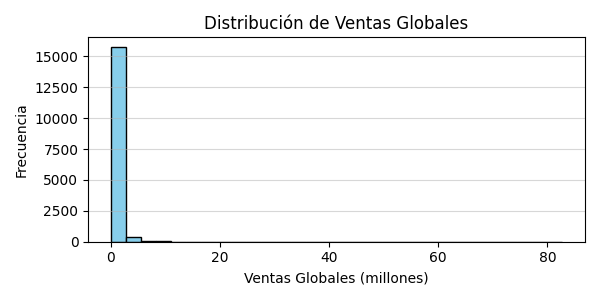

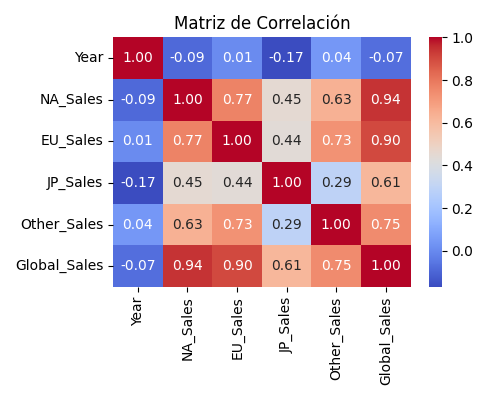

C:\Users\yoshi\AppData\Local\Temp\ipykernel_2340\543731836.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, ax1 = plt.subplots(figsize=(6, 3))


In [444]:
# Prueba manual de la función con los mismos valores que usaste en Gradio
try:
    resultado = gradio_prediccion_y_graficas(
        "Wii Sports", 2006, 41.49, 29.02, 3.77, 8.46, "Wii", "Sports", "Nintendo"
    )
    # Mostrar solo la predicción como texto
    print(resultado[0])
    # Mostrar imágenes en notebook (si existen)
    from IPython.display import display, Image as IPyImage
    import PIL.Image
    import numpy as np
    if resultado[1] is not None:
        display(PIL.Image.fromarray(np.asarray(resultado[1])))
    if resultado[2] is not None:
        display(PIL.Image.fromarray(np.asarray(resultado[2])))
except Exception as e:
    import traceback
    traceback.print_exc()